In [2]:
import pandas as pd
import numpy as np

In [20]:
monday_subs = pd.read_csv("subscribed_members_export_0b58976ce0_anonymous.csv", sep = ";")

In [23]:
deep_subs = pd.read_csv("subscribed_members.csv")

In [24]:
monday_subs

,MEMBER_RATING,OPTIN_TIME,OPTIN_IP,CONFIRM_TIME,CONFIRM_IP,LATITUDE,LONGITUDE,GMTOFF,DSTOFF,TIMEZONE,CC,REGION,LAST_CHANGED,LEID,EUID,NOTES,TAGS
0,4,2012-06-29 08:55:21,NaN,2019-03-24 19:33:45,NaN,47.6135000,'-122.2970000,NaN,NaN,206/564,us,wa,2019-03-24 19:33:45,75892635,549d9ac0d4,NaN,NaN
1,2,2015-10-26 14:09:53,NaN,2019-03-24 19:33:48,NaN,43.9426000,4.8171300,NaN,NaN,NaN,fr,pac,2019-03-24 19:33:48,75896671,c394a85099,NaN,NaN
2,5,2017-08-22 14:32:35,NaN,2019-03-24 19:33:37,NaN,40.7512000,'-73.9721000,NaN,NaN,212/332/646/917,us,ny,2019-03-24 19:33:37,75881095,a0268bf545,NaN,NaN
3,2,2018-03-19 09:46:14,NaN,2019-03-24 19:33:46,NaN,48.8302000,2.4461700,NaN,NaN,NaN,fr,idf,2019-03-24 19:33:46,75893031,32e3d82693,NaN,NaN
4,4,2019-10-15 07:11:27,NaN,2019-10-15 07:11:27,125.63.68.125,28.6037000,77.3044000,NaN,NaN,NaN,in,dl,2019-10-15 07:11:27,93869331,0f5b9df37c,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12357,5,2015-09-18 19:19:07,NaN,2019-03-24 19:33:44,NaN,51.5114000,5.5056100,NaN,NaN,NaN,nl,nb,2019-03-24 19:33:44,75890199,89def0af4b,NaN,NaN
12358,5,2016-12-12 13:24:12,NaN,2019-03-24 19:33:31,NaN,43.3001000,5.3828100,NaN,NaN,NaN,fr,pac,2019-03-24 19:33:31,75872791,0582c04e4f,NaN,NaN
12359,2,2019-02-08 09:42:54,NaN,2019-03-24 19:33:59,NaN,44.1366000,4.8050100,NaN,NaN,NaN,fr,pac,2019-03-24 19:33:59,75910831,7E+13,NaN,NaN
12360,2,2015-12-15 22:03:03,NaN,2019-03-24 19:33:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-24 19:33:51,75900663,ee2d6422f6,NaN,NaN


In [100]:
deep_subs["MEMBER_RATING"].mean()

3.9103061664510563

In [91]:
monday_user = monday_subs[["LEID","EUID","MEMBER_RATING"]]
deep_user = deep_subs[["LEID","EUID","MEMBER_RATING"]]

In [44]:
deep_user.EUID.value_counts()

∞E+00         9
69f342f458    1
898fed516d    1
6eacd397c2    1
b3249071a6    1
             ..
e4940c7263    1
94128715a6    1
1e30379bd0    1
d21bf9468e    1
4260bd93c3    1
Name: EUID, Length: 2311, dtype: int64

In [96]:
df = pd.merge(monday_user,deep_user, on = "EUID")
df

,LEID_x,EUID,MEMBER_RATING_x,LEID_y,MEMBER_RATING_y
0,75886451,c156e54339,5,88833751,3.0
1,75884759,2743d915cb,5,88834851,4.0
2,75877859,1e30379bd0,5,88834219,5.0
3,75908223,94c1515050,5,88795507,4.0
4,75907215,187055cead,5,88793843,5.0
...,...,...,...,...,...
1812,75884863,86ff70135f,5,88834883,4.0
1813,75867411,7ea96893ed,5,88896799,5.0
1814,75896947,42a659e055,5,88795691,5.0
1815,75881059,175459cd24,5,88815147,5.0


In [101]:
df["MEMBER_RATING_y"].mean()

4.083654375343974

In [102]:
df["MEMBER_RATING_x"].mean()

4.199779856906989

In [57]:
a=len(df)/len(deep_user.EUID)
b=1-a
a

0.7804982817869416

In [60]:
import matplotlib.pyplot as plt

C:\Users\Charles\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  


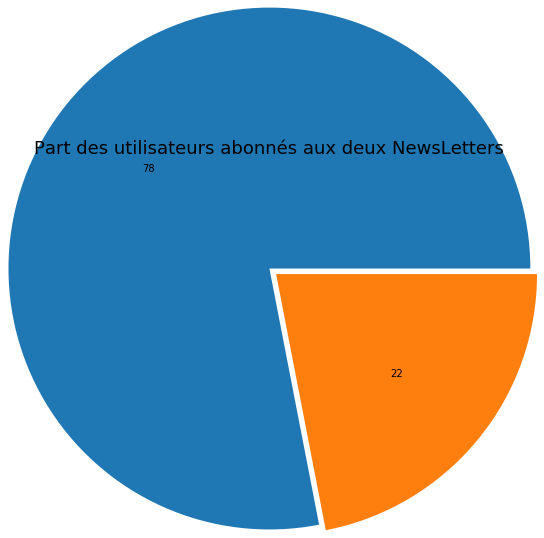

In [90]:
fig, ax=plt.subplots()
ax.set_title("Part des utilisateurs abonnés aux deux NewsLetters", fontsize=18)
plt.pie([a,b], explode = [0,.1], autopct='%.f', radius=3)

# plt.title("Abonnés au Monday Note")
plt.tight_layout()
# plt.savefig("Abonnés MondayNote")
plt.show()

In [58]:
d = {'Monday Subscribers': a, 'Others': b}
intersect = pd.DataFrame(data=d)

ValueError: If using all scalar values, you must pass an index

In [47]:
Percentage=pd.DataFrame{'Monday Subscribers': len(df[LEID_x])*100/len(deep_user.EUID), 'Others': (len(deep_user.EUID)-len(df[LEID_x]))*100/len(deep_user.EUID)}

SyntaxError: invalid syntax (<ipython-input-47-97cc8d72e412>, line 1)